In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the dataset and Extracting the Independent and Dependent variables
#companies = pd.read_csv('C:/Users/avijeet.biswal/Desktop/1000_Companies.csv')
#X = companies.iloc[:, :-1].values
#y = companies.iloc[:, 4].values

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Linear_Regression_predict_profit.csv to Linear_Regression_predict_profit.csv


In [ ]:
companies = pd.read_csv('Linear_Regression_predict_profit.csv')

In [ ]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-6-f1e942f735a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

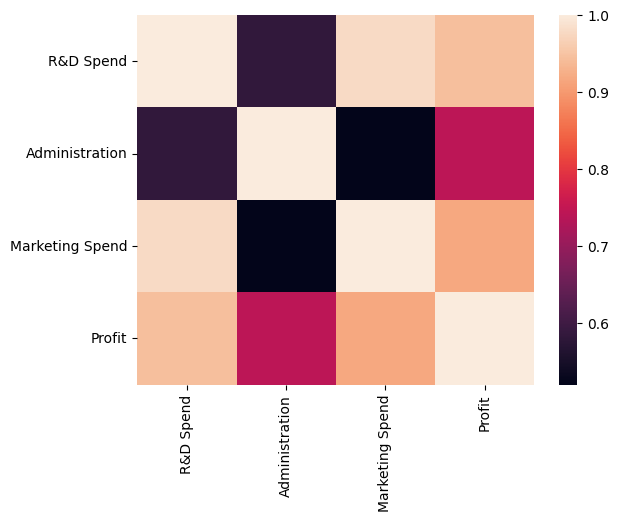

In [ ]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr())

In [ ]:
X = companies.drop('Profit',axis='columns')
Y = companies.Profit
#companies.State.value_counts()


In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:,3] = labelencoder.fit_transform(X[:,3])
ohe=OneHotEncoder()
#ohe = OneHotEncoder(categorical_features = 'State')
feature_array = ohe.fit_transform(X[["State"]]).toarray()


In [ ]:
# Avoiding the Dummy Variable Trap
#X = X[:, 1:]


In [ ]:
ohe.categories_

[array(['California', 'Florida', 'New York'], dtype=object)]

In [ ]:
feature_labels=ohe.categories_
feature_labels=np.array(feature_labels).ravel()
print(feature_labels)

['California' 'Florida' 'New York']


In [ ]:
#we are creating a data frame with column lables
features=pd.DataFrame(feature_array,columns=feature_labels)
features

,California,Florida,New York
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
995,1.0,0.0,0.0
996,1.0,0.0,0.0
997,1.0,0.0,0.0
998,1.0,0.0,0.0


In [ ]:
#Concatinating the features variable to the original dataset
new_X=pd.concat([X,features],axis=1)

,R&D Spend,Administration,Marketing Spend,State,California,Florida,New York
0,165349.20,136897.800,471784.1000,New York,0.0,0.0,1.0
1,162597.70,151377.590,443898.5300,California,1.0,0.0,0.0
2,153441.51,101145.550,407934.5400,Florida,0.0,1.0,0.0
3,144372.41,118671.850,383199.6200,New York,0.0,0.0,1.0
4,142107.34,91391.770,366168.4200,Florida,0.0,1.0,0.0
...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,1.0,0.0,0.0
996,134970.00,130390.080,329204.0228,California,1.0,0.0,0.0
997,100275.47,241926.310,227142.8200,California,1.0,0.0,0.0
998,128456.23,321652.140,281692.3200,California,1.0,0.0,0.0


In [ ]:
new_X = new_X.drop(columns=['State'])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
#y_pred

In [ ]:
#new_X.shape

(1000, 6)

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]


In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

-51561.464947771135


In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112695892268795